In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
iris.describe()


,sepal.length,sepal.width,petal.length,petal.width,variety
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

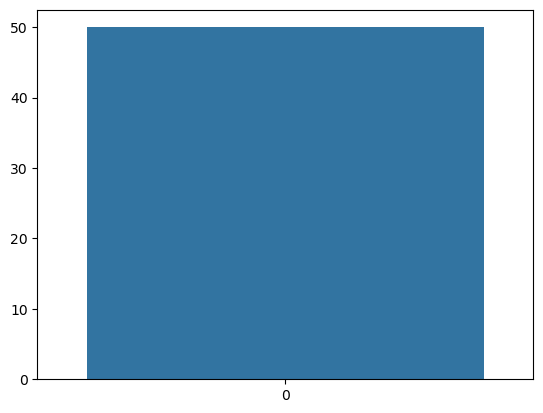

In [6]:
counts = iris["variety"].value_counts()
sns.barplot(data = counts)

In [7]:
iris[iris.duplicated(keep = False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


### OBSERVATIONS
- There are 1 Duplicated Row
- There are no null values
- there are 150 row and 5 columns
- the x columns are sepal.length, sepal.width, petal.length, petal.width
- variety is y column which is catogorical
- there are three flowerr categories
- all the x columns are continuos
  

In [8]:
iris = iris.drop_duplicates(keep = 'first')

In [9]:
iris[iris.duplicated]

,sepal.length,sepal.width,petal.length,petal.width,variety


In [10]:
iris = iris.reset_index(drop=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Virginica
145,6.3,2.5,5.0,1.9,Virginica
146,6.5,3.0,5.2,2.0,Virginica
147,6.2,3.4,5.4,2.3,Virginica


In [11]:
labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Observation
- the target column ('variety') is still object type . it needs to be converted to numeric(int)

In [13]:
iris['variety']= pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [14]:
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [15]:
#divide the data set into x and y columns
X = iris.iloc[:,0:4]
Y = iris['variety']

In [16]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: variety, Length: 149, dtype: int32

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state = 1)
x_train


,sepal.length,sepal.width,petal.length,petal.width
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

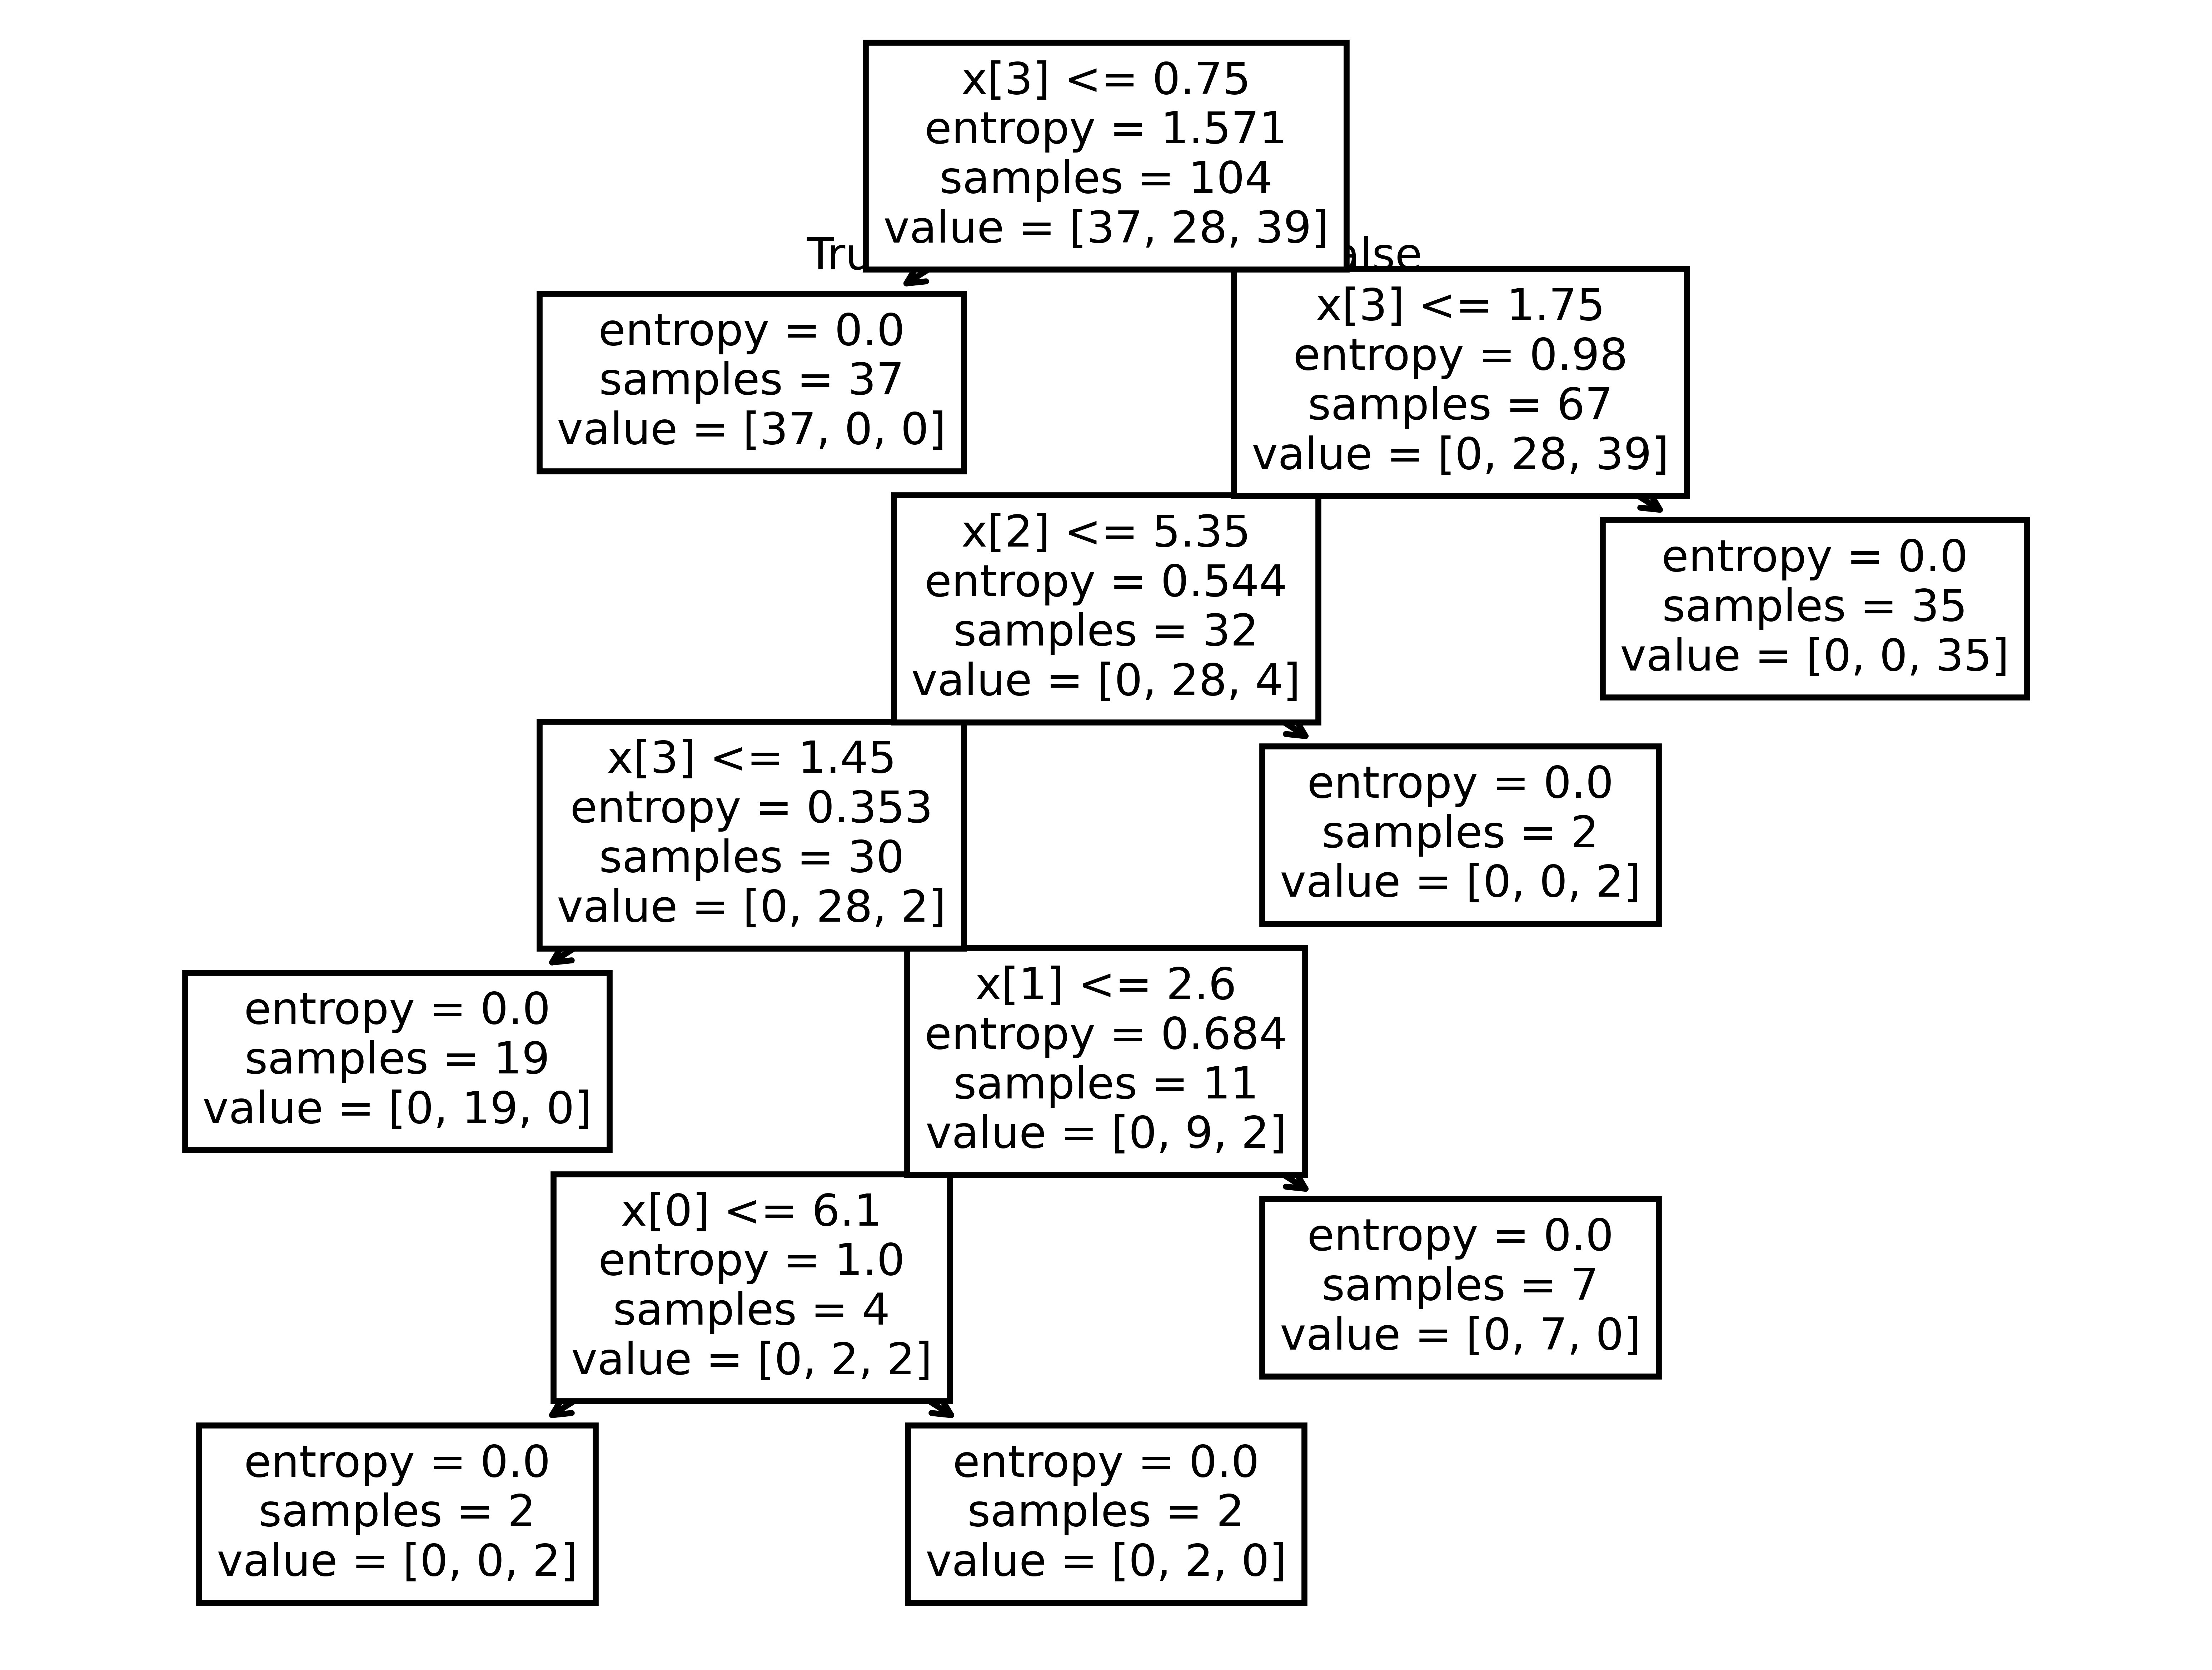

In [27]:
plt.figure(dpi=1200)
tree.plot_tree(model);

[Text(0.5, 0.9285714285714286, 'petal width(cm) <= 0.75\nentropy = 1.571\nsamples = 104\nvalue = [37, 28, 39]\nclass = virginica'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.41666666666666663, 0.8571428571428572, 'True  '),
 Text(0.6666666666666666, 0.7857142857142857, 'petal width(cm) <= 1.75\nentropy = 0.98\nsamples = 67\nvalue = [0, 28, 39]\nclass = virginica'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.5, 0.6428571428571429, 'petal length(cm) <= 5.35\nentropy = 0.544\nsamples = 32\nvalue = [0, 28, 4]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'petal width(cm) <= 1.45\nentropy = 0.353\nsamples = 30\nvalue = [0, 28, 2]\nclass = versicolor'),
 Text(0.16666666666666666, 0.35714285714285715, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19, 0]\nclass = versicolor'),
 Text(0.5, 0.35714285714285715, 'sepal width(cm) <= 2.6\nentropy = 0.684\nsamples = 11\nvalue = [0, 9, 2]\nclass 

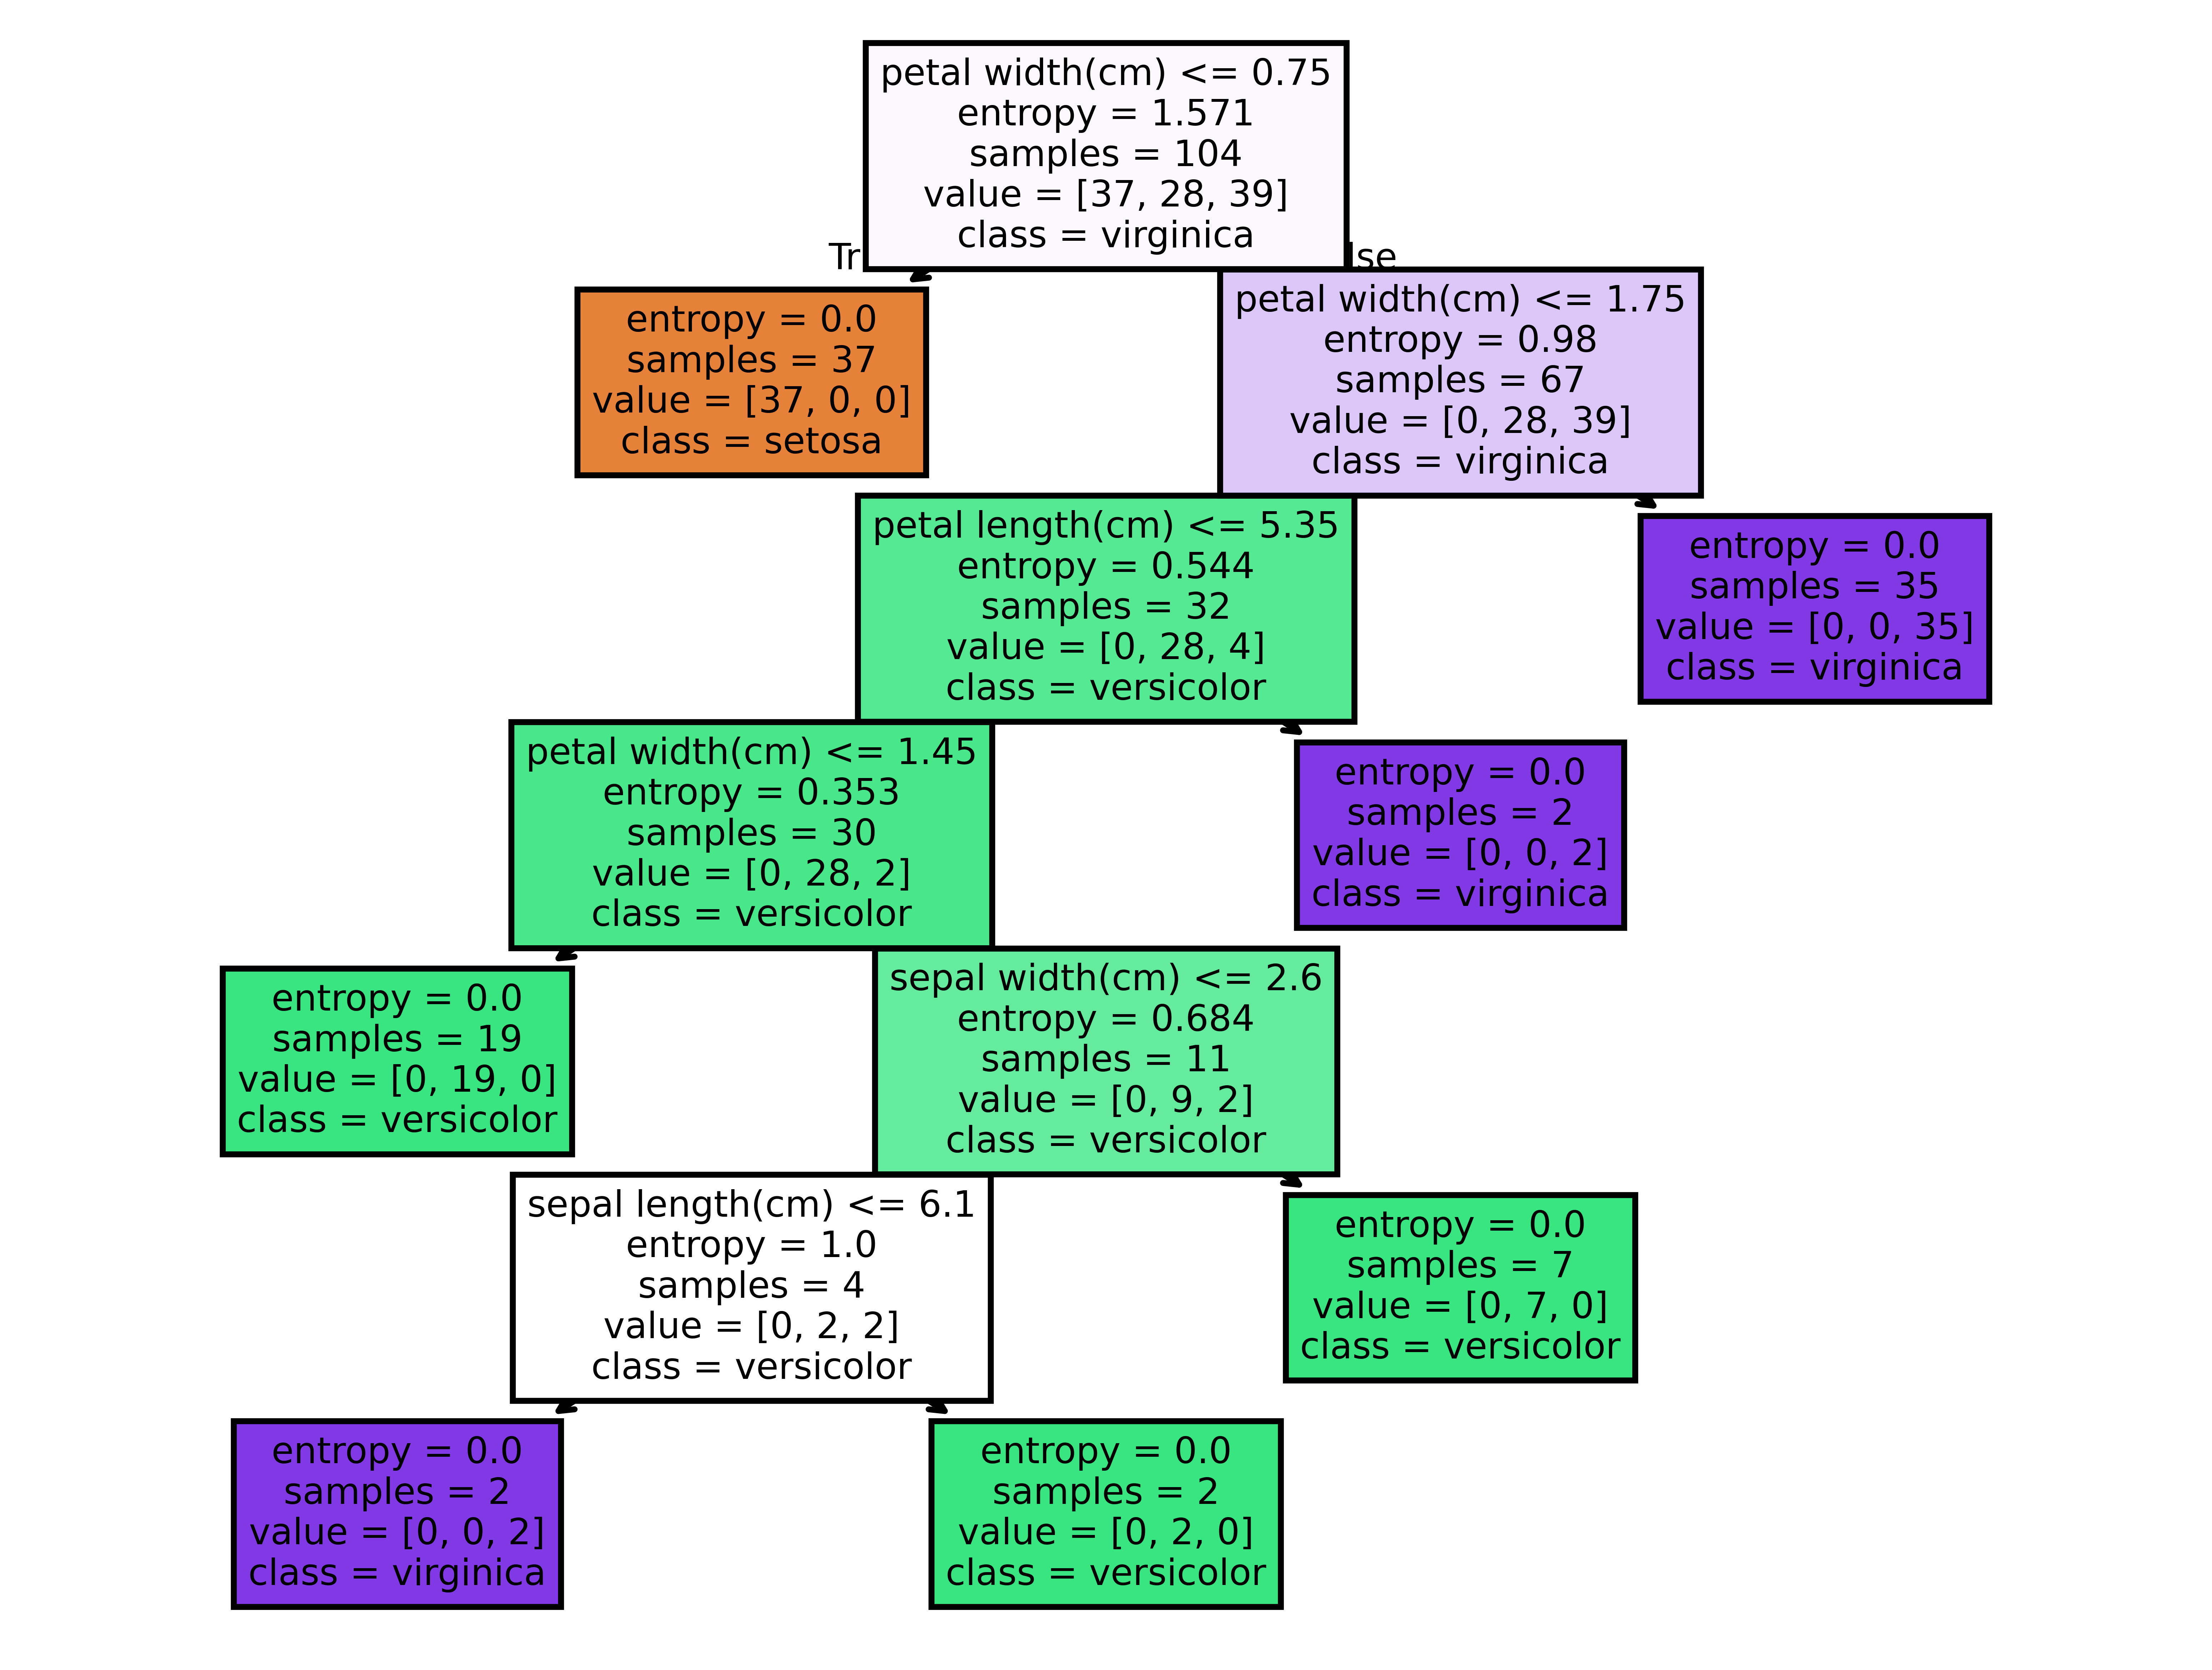

In [28]:
fn = ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn = ['setosa','versicolor','virginica']
plt.figure(dpi = 1200)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled=True)

In [31]:
preds = model.predict(x_test)
preds

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       0])

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [33]:
pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



#### Building Decision Tree Classifier using Entropy Criteria

In [29]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

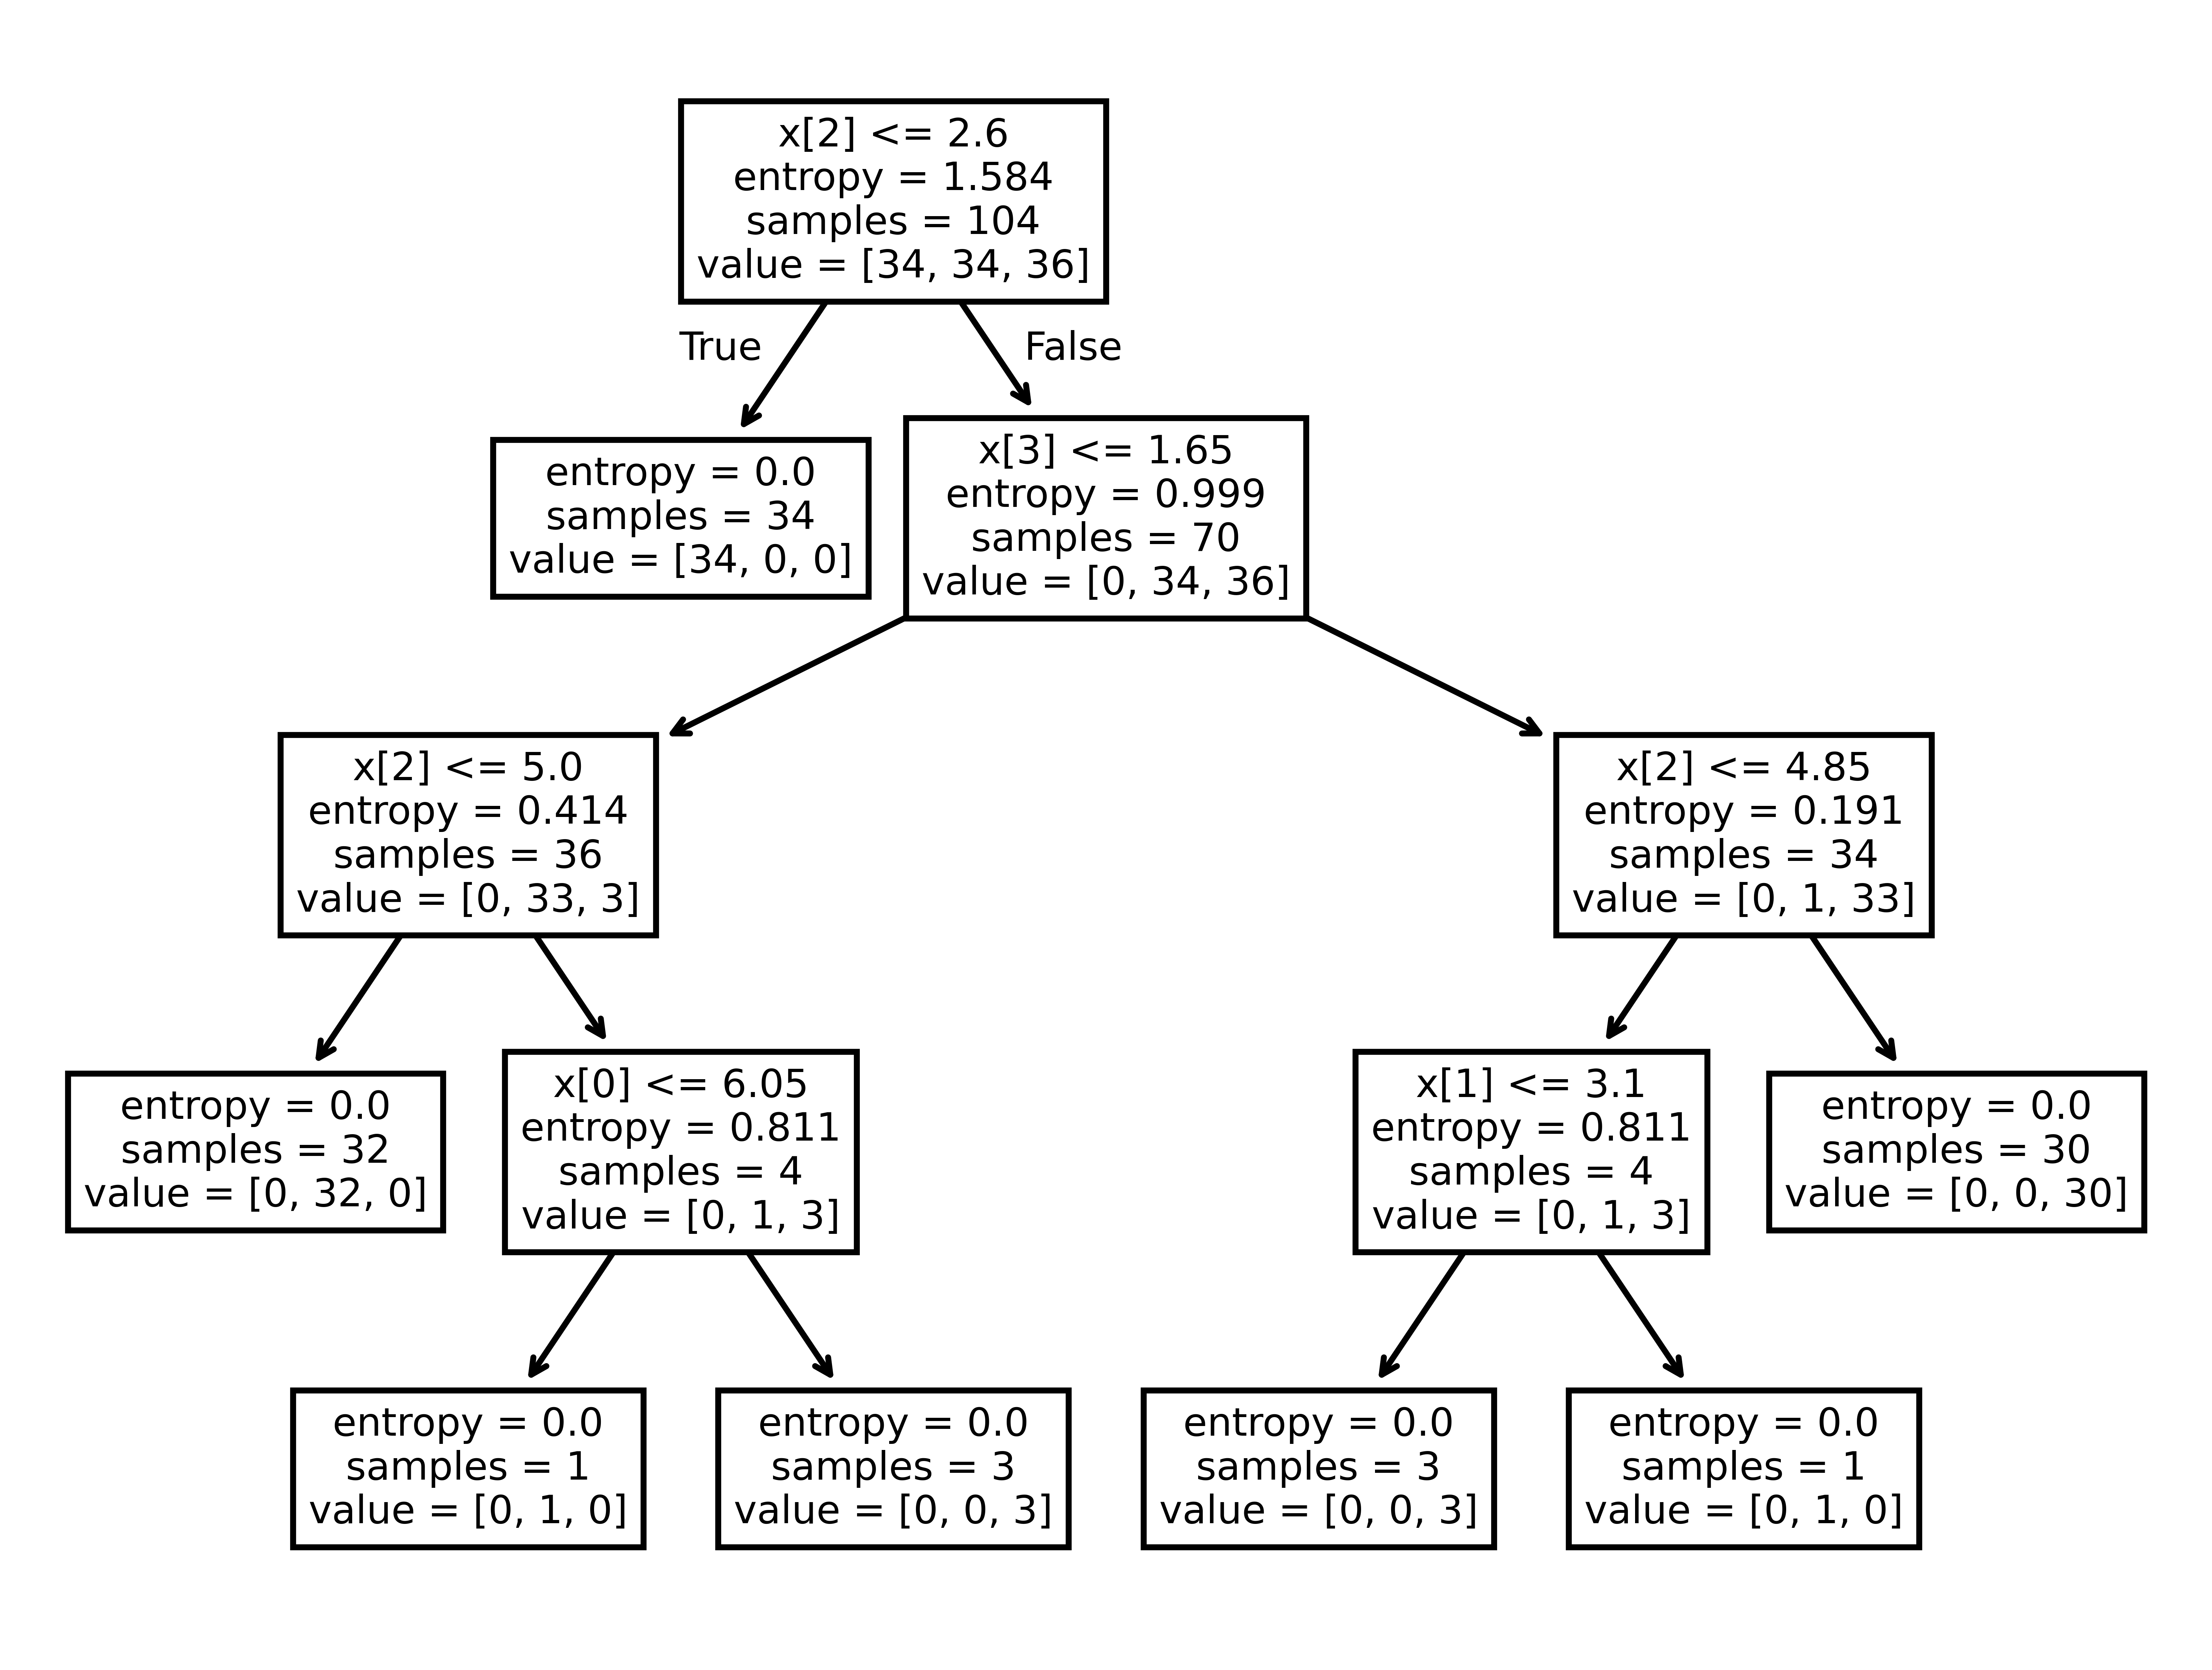

In [30]:
plt.figure(dpi=1200)
tree.plot_tree(model);